# Artificial Neural Network

### Importing the libraries

In [257]:
!pip install tensorflow

In [258]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [259]:
tf.__version__

'2.17.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [262]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

### Encoding categorical data

Label Encoding the "Gender" column

In [265]:
print(X[:,2])

['Female' 'Female' 'Female' ... 'Female' 'Male' 'Female']


In [266]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

One Hot Encoding the "Geography" column

In [268]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [269]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Feature Scaling

In [273]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [276]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [278]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [280]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [282]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [285]:
ann.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

### Training the ANN on the Training set

In [287]:
ann.fit(X_train, y_train, batch_size=32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 297us/step - accuracy: 0.4739 - loss: 0.7619
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.7854 - loss: 0.5438
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - accuracy: 0.8056 - loss: 0.4695
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.8156 - loss: 0.4397
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.8120 - loss: 0.4384
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.8169 - loss: 0.4263
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.8094 - loss: 0.4309
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.8135 - loss: 0.4285
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.8187 - loss: 0.4170
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.8138 - loss: 0.4265
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.8206 - loss: 0.4157
Epoch 12/100
250/25

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation


Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

In [302]:
print(ann.predict(sc.transform([[1,0,0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[False]]


In [292]:
print(le.transform(['Male']))

[1]


In [304]:
new_obs = [[600, 'France', le.transform(['Male']), 40, 3, 600, 2, 1, 1, 50000]]
new_obs = np.array(ct.transform(new_obs))
print(new_obs)

[[1.0 0.0 0.0 600 array([1]) 40 3 600 2 1 1 50000]]


In [306]:
print(ann.predict(sc.transform(new_obs)) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[False]]


### Predicting the Test set results

In [314]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


### Making the Confusion Matrix

In [316]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1520   65]
 [ 214  201]]


0.8605

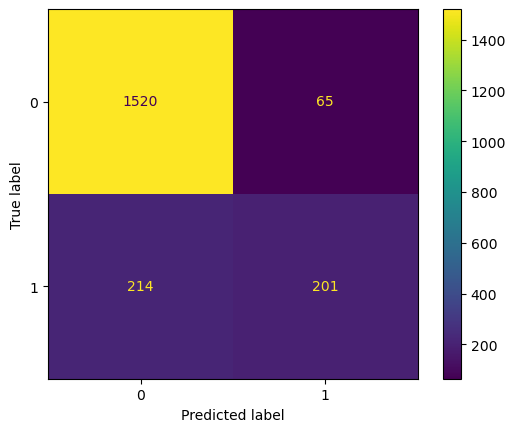

In [320]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)